## 5.4 特征工程<br>
### 主要内容
* 5.4.1 分类特征
* 5.4.2 文本特征
* 5.4.3 图像特征
* 5.4.5 衍生特征
* 5.5.5 缺失值填充
* 5.4.6 特征管道
<br>
<br>

#### 5.4.1 分类特征

In [3]:
#对于下面的数据
data = [{'price':850000,'rooms':4,'neighborhood':'Queen Anne'},
        {'price':700000,'rooms':3,'neighborhood':'Fremont'},
        {'price':650000,'rooms':3,'neighborhood':'Wallingfold'},
        {'price':600000,'rooms':2,'neighborhood':'Fremont'}]
#有种做法是将分类特征用映射关系编码成整数
#{'queen Anne':1,'Fremont':2,'Wallingfold':3}
#但这不是一个好办法，因为特征不存在数值上的关系(Queen Anne < Fremont < Wallingfold)
#解决方法是使用独热编码。让0和1出现在对应的列分别表示每个分类值有或无
from sklearn.feature_extraction import DictVectorizer,FeatureHasher
from sklearn.preprocessing import OneHotEncoder
vec = DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [11]:
#如果分类特征有许多枚举值，那么容易造成数据集维度剧增，因为存在很多0，故可使用稀疏矩阵表示
vec = DictVectorizer(sparse=True,dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

---
#### 5.4.2 文本特征
> **单词统计**

In [15]:
#假设以下样本，统计每个短语每个单词出现的次数
sample = ['problem of evil',
          'evil queen',
          'horizon problem']
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
print(X)

  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (1, 4)	1
  (1, 0)	1
  (2, 1)	1
  (2, 3)	1


In [18]:
import pandas as pd
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [20]:
#为避免让一些常用词聚集太高的权重。使用TF-IDF(词频-逆文本频率)，通过单词在文本中出现的频率来衡量其权重
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


---
#### 5.4.3 图像特征
> 用像素表示图像

#### 5.4.4 衍生特征
> **基函数回归**：将一个线性回归转换成多项式回归时，并不是通过改变模型来实现，而是通过改变输入数据

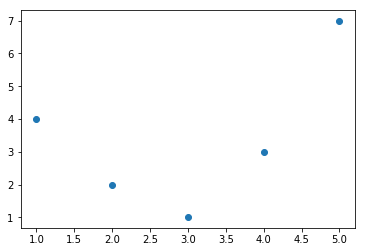

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x,y)

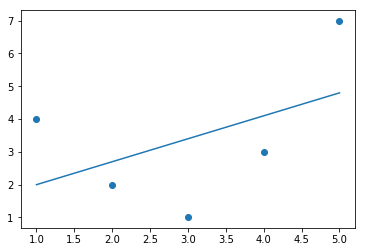

In [33]:
#显然该数据用直线拟合效果会很差
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = x[:,np.newaxis]
y_model = model.fit(X,y).predict(X)
plt.scatter(x,y)
plt.plot(X,y_model)

In [34]:
#增加额外的特征来提升模型的复杂度
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


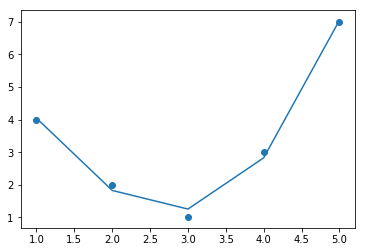

In [36]:
model = LinearRegression().fit(X2,y)
y2 = model.predict(X2)
plt.scatter(x,y)
plt.plot(x,y2)

---
#### 5.4.5 缺失值填充


In [38]:
from numpy import nan
X = np.array([[nan,0,3],
              [3,7,9],
              [3,5,2],
              [4,nan,6],
              [8,8,1]])
y = np.array([14,16,-1,8,-5])

from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

---
#### 5.4.6 特征管道
> 将操作组合起来

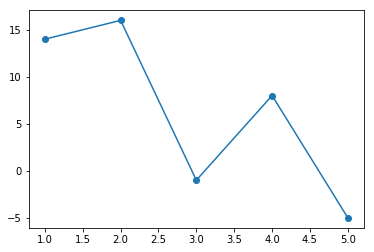

In [40]:
#1.用均值填充缺失值
#2.将衍生特征转换成二次方
#3.拟合线性回归模型
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())
model.fit(X,y)
y_model = model.predict(X)
plt.scatter(x,y)
plt.plot(x,y_model)